# Modelling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

**import cleaned data**

In [5]:
data = pd.read_csv('cleaned_data.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [7]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

**splitting the data**

In [29]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 10 , train_size = 0.8)

# Logistic Regression Model

**BASELINE MODEL**

In [27]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(X_train , y_train)

LogisticRegression()

**Coefficient and intercept**

In [72]:
#coeficient
print("coefficient : " ,LR_model.coef_)
print("Intercept : " , LR_model.intercept_)

coefficient :  [[ 5.46034488e-02  6.80254895e-04  6.96382180e-05  6.46793411e-04
  -7.59904654e-02 -2.26476239e-04 -2.22750699e-06  9.70881709e-03
   1.12510612e-02 -5.86511922e-04 -9.65447733e-04 -2.02324631e-02]]
Intercept :  [0.00029188]


**Train Accuracy**

In [35]:
from sklearn.metrics import accuracy_score
X_train_predict = LR_model.predict(X_train)
print('Train accuracy : ' , accuracy_score(y_train , X_train_predict))

Train accuracy :  0.8326359832635983


**Test Accuracy**

In [78]:
X_test_predict = LR_model.predict(X_test)
print('Test Accuracy : ' , accuracy_score(y_test , X_test_predict))

Test Accuracy :  0.8


**CV Score**

In [37]:
from sklearn.model_selection import cross_val_score
print("CV Score : ", cross_val_score(LR_model , X_train , y_train , cv = 5 , scoring = 'accuracy').mean())

CV Score :  0.8202127659574469


# Fine Tuning

**Random State**

In [17]:
Train , Test , CV_score = [] , [] , []

In [153]:
for i in range(1,100):
    X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = i , train_size = 0.8)
    LR_model = LogisticRegression()
    LR_model.fit(X_train , y_train)
    
    Xtrain_pred = LR_model.predict(X_train)
    Train.append(accuracy_score(y_train , Xtrain_pred))
    
    Xtest_pred = LR_model.predict(X_test)
    Test.append(accuracy_score(y_test , Xtest_pred))
    
    CV_score.append(cross_val_score(LR_model , X_train , y_train , cv = 5 , scoring = 'accuracy').mean())
    
acc = pd.DataFrame({'Train' : Train , 'Test' : Test , 'CV_score' : CV_score})

In [155]:
acc[(abs(acc['Train'] - acc['Test']) <= 0.01) & (abs(acc['CV_score'] - acc['Test']) <= 0.01) & (abs(acc['CV_score'] - acc['Train']) <= 0.01)]

,Train,Test,CV_score
8,0.815900,0.816667,0.815869
11,0.836820,0.833333,0.832535
61,0.824268,0.816667,0.816135
68,0.824268,0.816667,0.816135


**Best random state : 12** 

Training model with the best random state

In [157]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 12 , train_size = 0.8)
updated_model = LogisticRegression()
updated_model.fit(X_train , y_train)

print("coeff : " , updated_model.coef_)
print("Intercept : " , updated_model.intercept_)
Xtrain_pred = updated_model.predict(X_train)
print("train acc :" ,accuracy_score(y_train , Xtrain_pred))
    
Xtest_pred = updated_model.predict(X_test)
print("Test acc: " ,accuracy_score(y_test , Xtest_pred))
    
print("CV score : " ,cross_val_score(updated_model , X_train , y_train , cv = 5 , scoring = 'accuracy').mean())

coeff :  [[ 5.68466065e-02  4.50155472e-04  9.43203042e-05 -3.19176937e-05
  -6.94420402e-02  4.53091561e-05  7.26648597e-07  6.69491848e-03
   9.40865948e-04 -3.80234777e-04 -3.02872058e-04 -1.88535056e-02]]
Intercept :  [0.00018225]
train acc : 0.8368200836820083
Test acc:  0.8333333333333334
CV score :  0.8325354609929076


# Confusion matrix , ROC , AUC CURVE

**Confusion Matrix**

In [172]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , Xtest_pred)
cm

array([[36,  3],
       [ 7, 14]])

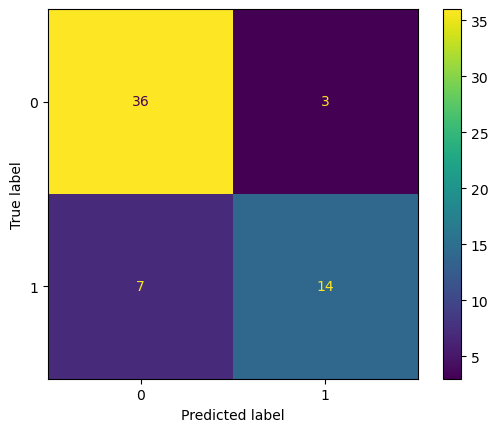

In [180]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm , display_labels = [0,1]).plot()
plt.show()

**ROC Curve**

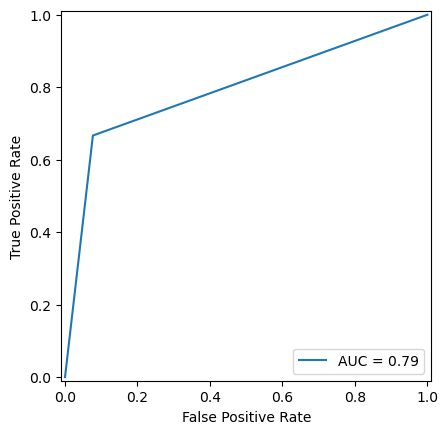

In [187]:
from sklearn.metrics import roc_curve , auc , RocCurveDisplay

fpr , tpr , threshold = roc_curve(y_test , Xtest_pred)
roc_auc = auc(fpr , tpr)
RocCurveDisplay(fpr = fpr , tpr = tpr , roc_auc = roc_auc).plot()
plt.show()

**F1 Score**

In [192]:
from sklearn.metrics import classification_report
classification_report(y_test , Xtest_pred)


'              precision    recall  f1-score   support\n\n           0       0.84      0.92      0.88        39\n           1       0.82      0.67      0.74        21\n\n    accuracy                           0.83        60\n   macro avg       0.83      0.79      0.81        60\nweighted avg       0.83      0.83      0.83        60\n'

**FINE TUNING HYPER PARAMETERS**

In [19]:
from sklearn.model_selection import GridSearchCV

estimator = LogisticRegression(random_state = 12)
param_grid = [{'penalty':['l1','l2','elasticnet','none'],
               'C' : np.logspace(-4,4,20),
               'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
               'max_iter'  : [100,1000,2500,5000]}]

model = GridSearchCV(estimator , param_grid , cv = 5 , scoring = 'accuracy')
model.fit(X,y)
model.best_params_

{'C': 0.23357214690901212,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

**Got {'C': 0.0001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}**

In [39]:
finetuned_model = LogisticRegression(C= 0.23357214690901212,max_iter= 100,penalty= 'l2',solver= 'liblinear')
finetuned_model.fit(X_train , y_train)

print("coeff : " , finetuned_model.coef_)
print("Intercept : " , finetuned_model.intercept_)
Xtrain_pred = finetuned_model.predict(X_train)
print("train acc :" ,accuracy_score(y_train , Xtrain_pred))
    
Xtest_pred = finetuned_model.predict(X_test)
print("Test acc: " ,accuracy_score(y_test , Xtest_pred))
    
print("CV score : " ,cross_val_score(finetuned_model , X_train , y_train , cv = 5 , scoring = 'accuracy').mean())

coeff :  [[ 5.96876137e-02  1.41760553e-03  9.40622056e-05  1.92655942e-03
  -7.70043112e-02 -5.82591697e-04 -1.72506848e-06  1.95867606e-02
   8.00065066e-03 -2.08882007e-03 -2.36416602e-03 -2.03820428e-02]]
Intercept :  [0.00045926]
train acc : 0.8284518828451883
Test acc:  0.8
CV score :  0.8160460992907801


**confusion matrix for finetuned model**

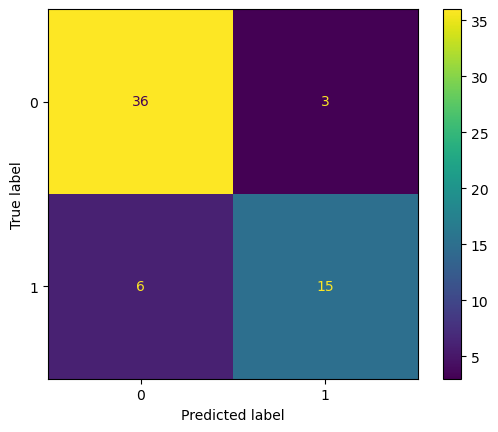

In [246]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
cm = confusion_matrix(y_test , Xtest_pred)
ConfusionMatrixDisplay(cm,display_labels = [0,1]).plot()
plt.show()

**ROC Curve**

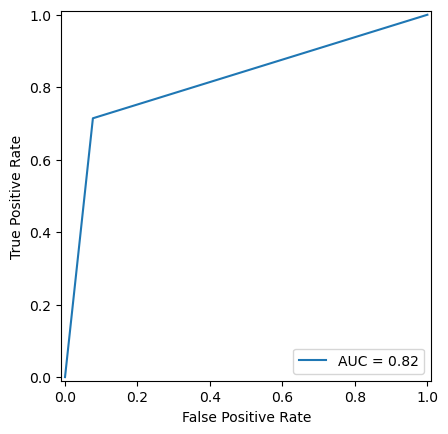

In [249]:
from sklearn.metrics import roc_curve , auc , RocCurveDisplay

fpr , tpr , threshold = roc_curve(y_test , Xtest_pred)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr = fpr, tpr = tpr , roc_auc = roc_auc).plot()
plt.show()